<a href="https://colab.research.google.com/github/Lannn21/11-05-2023/blob/main/Exercise_Week_4_Classification_Model_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lannn21/Week4DataMine/refs/heads/main/penguins_size.csv')
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,MALE
313,Gentoo,Biscoe,49.5,16.1,224.0,5650.0,MALE
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,MALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,MALE
255,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,MALE
30,Adelie,Dream,39.5,16.7,178.0,3250.0,FEMALE
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,MALE
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
print(df.value_counts('species'))
print(df.value_counts('island'))
print(df.value_counts('sex',dropna=False))

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Drop the null column(s)

In [6]:
df.dropna(inplace=True)
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [7]:

df.loc[df['sex'] == '.', 'sex'] = 'MALE'

In [8]:
df.loc[336]

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,MALE


7. Create your own insightful visualization and explain it in at least 2 sentences

In [9]:
import matplotlib.pyplot as plt

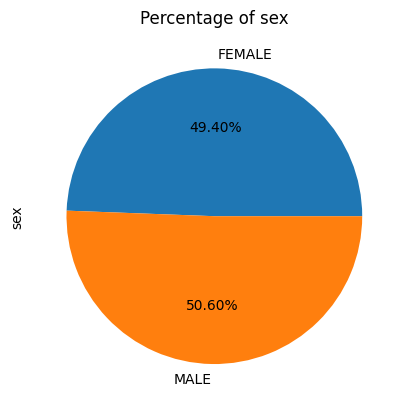

Mengetahui persentase kelamin dari dataset penguin. Didapat informasi bahwa Laki laki lebih unggul 0.60%


In [10]:
data = df.groupby("sex")["sex"].count()
data.plot(kind='pie', autopct='%1.2f%%',
title='Percentage of sex')
plt.show()
print("Mengetahui persentase kelamin dari dataset penguin. Didapat informasi bahwa Laki laki lebih unggul 0.60%")


8. Check unique value of our target variable

In [11]:
for column in ['species']:
  print(df[column].unique())

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [12]:
island_en = {'Torgersen': 2,'Biscoe': 0, 'Dream': 1}
sex_en = {'MALE': 1, 'FEMALE' : 0}

df['island'] = df['island'].map(island_en)
df['sex'] = df['sex'].map(sex_en)


In [13]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results

In [14]:
species_en = {'Adelie': 0,'Chinstrap': 0, 'Gentoo': 1}

df['species'] = df['species'].map(species_en)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

In [15]:
import seaborn as sns

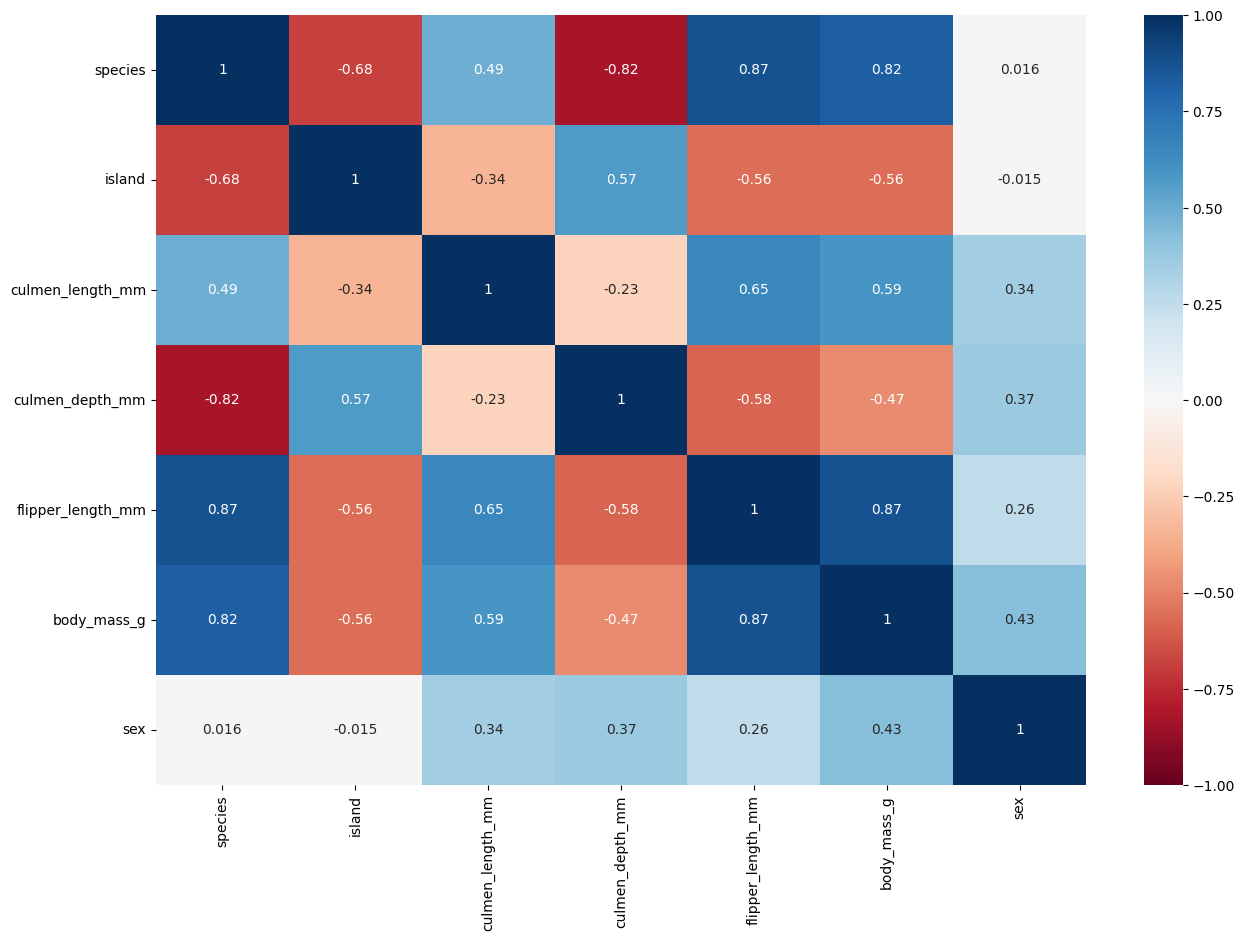

Heatmap ini menunjukkan korelasi antar fitur. Fitur **species** berkorelasi positif kuat dengan `culmen_length_mm`, `flipper_length_mm`, dan `body_mass_g`. Sementara, **sex** memiliki korelasi moderat dengan `culmen_depth_mm` dan `body_mass_g`.


In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.show()

print("Heatmap ini menunjukkan korelasi antar fitur. Fitur **species** berkorelasi positif kuat dengan `culmen_length_mm`, `flipper_length_mm`, dan `body_mass_g`. Sementara, **sex** memiliki korelasi moderat dengan `culmen_depth_mm` dan `body_mass_g`.")

## Machine Learning

1. Splitting X and y

In [17]:
X = df.drop(['species'], axis=1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [22]:
y_pred_en = clf_en.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


In [24]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.5, 0.8333333333333334, 'x[3] <= 206.5\nentropy = 0.945\nsamples = 267\nvalue = [170, 97]'),
 Text(0.25, 0.5, 'x[2] <= 14.95\nentropy = 0.054\nsamples = 164\nvalue = [163, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 163\nvalue = [163, 0]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nentropy = 0.358\nsamples = 103\nvalue = [7, 96]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]')]

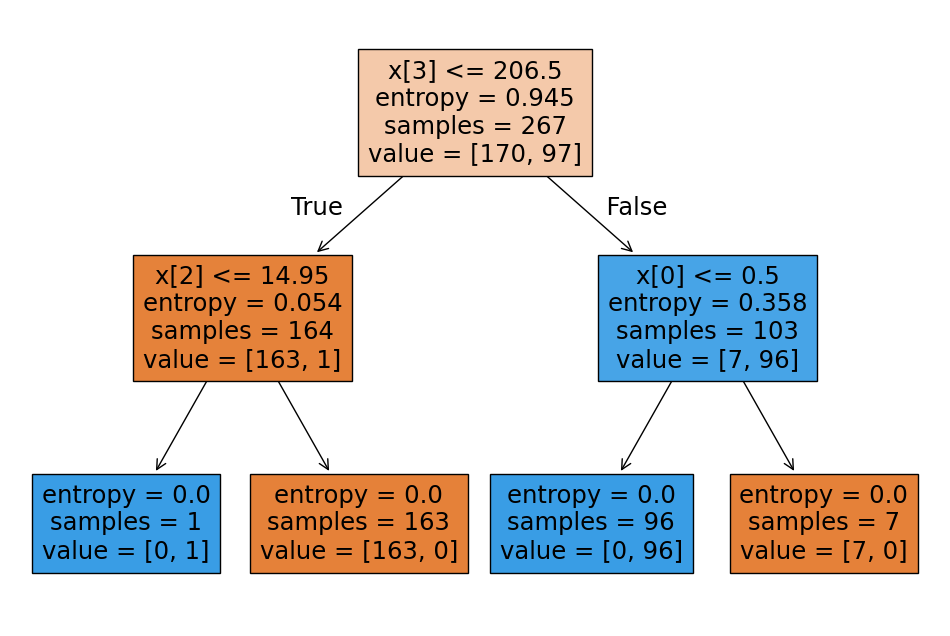

In [25]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True)

2. Criterion Gini index

In [26]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred_gini = clf_gini.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format (accuracy_score (y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [29]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.5, 0.8333333333333334, 'x[3] <= 206.5\ngini = 0.463\nsamples = 267\nvalue = [170, 97]'),
 Text(0.25, 0.5, 'x[2] <= 14.95\ngini = 0.012\nsamples = 164\nvalue = [163, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 163\nvalue = [163, 0]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\ngini = 0.127\nsamples = 103\nvalue = [7, 96]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

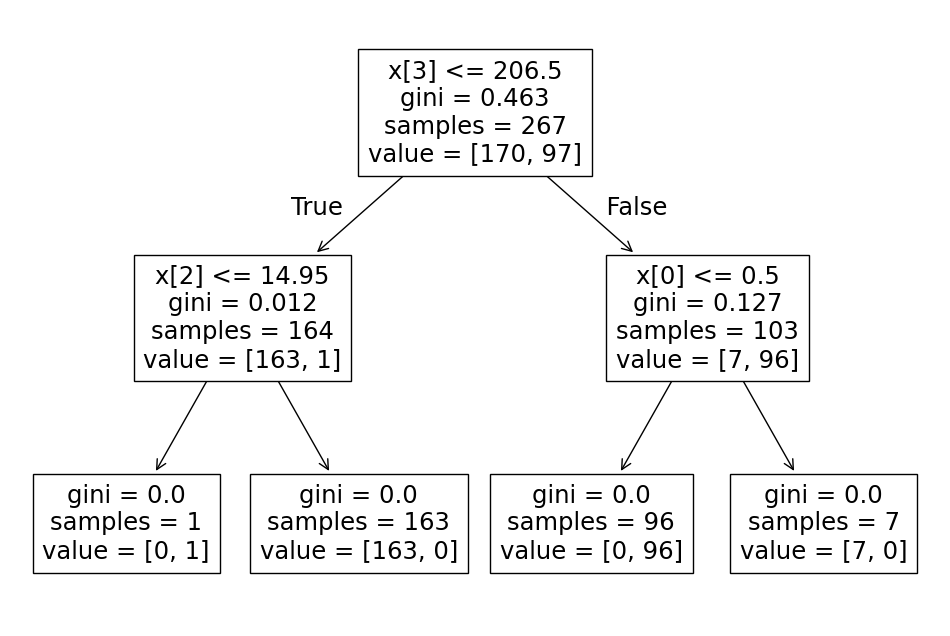

In [30]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [33]:
clf_entropy = DecisionTreeClassifier(criterion="entropy") # Initialize the classifier with 'entropy'
clf_entropy.fit(X_train, y_train)  # Fit the model
y_pred_entropy = clf_entropy.predict(X_test) # Make predictions

conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy:\n", conf_matrix_entropy)

# Confusion matrix for Gini Index
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Classification report for Entropy
print("\nClassification Report for Entropy:\n", classification_report(y_test, y_pred_entropy))

# Classification report for Gini Index
print("\nClassification Report for Gini Index:\n", classification_report(y_test, y_pred_gini))

Confusion Matrix Entropy:
 [[44  0]
 [ 0 23]]
Confusion Matrix Gini Index:
 [[44  0]
 [ 0 23]]

Classification Report for Entropy:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Classification Report for Gini Index:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [39]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [40]:
nb_y_pred = nb_classifier.predict(X_test)

In [42]:
nb_matrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)


Confusion Matrix Gini Index:
 [[44  0]
 [ 0 23]]


In [43]:
print("\nClassification Report for Entropy:\n", classification_report(y_test, nb_y_pred))



Classification Report for Entropy:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Good Luck :)